In [2]:
from pymaxed.maxed import Maxed
from pymaxed.vectors import Vec
from pymaxed.pdfs import bi_normal_ref_1
from pyapes.core.mesh import Mesh
from pyapes.core.geometry import Box

# Demo of the Maximum Entropy Distribution problem

Given is a set of moments $\vec{m} = [1, 0, 1, -0.27, 1.7178]^T$ the entropy constraints of the Maximum Entropy distribution in the 1D phase space $\vec{u}$.

For the given problem, we'd like to reconstruct the distribution

$$
f^{MED}_{\vec{\lambda}} := exp(\vec{\lambda}\cdot\Phi(\vec{u}))
$$.

This can be achieved by solving the unconstrained minimization problem:

$$
\vec{\lambda}(\vec{m}) = argmin \left\{\int exp(\vec{\tilde{\lambda}} \cdot \Phi(\vec{u}) d\vec{u} - \vec{\tilde{\lambda}}\cdot \vec{m}\right\}.
$$

## Numerical implementation

Using `pymaxed` package, above mathematical problem reads


In [3]:
target = [1, 0, 1, -0.27, 1.7178] # target moments set. Can be either list of float or Tensor
mesh = Mesh(Box[-5:5], None, [200]) # Phase space. For the cartensian mesh, use the Box geometry. For the cylindrical mesh, use the Cylinder geometry
vec = Vec(mesh, target, 4, [200]) # Construct the vector spaces for the polynomial basis

maxed = Maxed(vec) # Construct the MaxEd object

maxed.solve() # Solve for the gamma

## Results

From the results of the minimization problem, we can reconstruct the distribution by calling `Maxed.dist_from_coeffs` function.

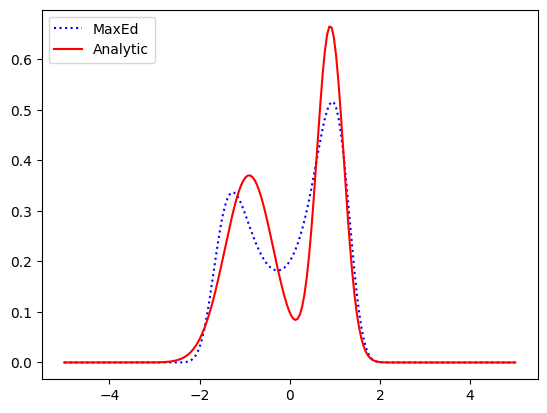

In [4]:

import matplotlib.pyplot as plt
analytic = bi_normal_ref_1(mnts_order=4, m=0.9, s=0.3, bound=5, n_vel=200)


_, ax = plt.subplots(1, 1)
plt.plot(vec.dv[0], maxed.dist, "b:", label="MaxEd")
plt.plot(vec.dv[0], analytic["pdf"], "r-", label="Analytic")
plt.legend(loc="upper left")
